This Notebook analyzes the Feature Importance using the Decrease in Impurity (MID) method by training a Random Forest Model on the Analyses Results.

In [1]:
import pandas as pd

analysis_file_path = "/workspaces/thesis/output/analysis_results.csv"
analysis_df: pd.DataFrame = pd.read_csv(analysis_file_path)

In [2]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  123 non-null    int64 
 1   ID          123 non-null    object
 2   Name        123 non-null    object
 3   Place Type  123 non-null    object
 4   Attitude    123 non-null    object
 5   Thoughts    123 non-null    object
 6   CF1         42 non-null     object
 7   CF2         20 non-null     object
 8   CF3         35 non-null     object
 9   CF4         8 non-null      object
 10  CF5         20 non-null     object
dtypes: int64(1), object(10)
memory usage: 10.7+ KB


In [3]:
# count number of rows per Place Type which have specific values for the CF columns
def count_places_confronted_with_ffpv(place_type: str):
    pr = analysis_df[analysis_df["Place Type"] == place_type]
    cf_planning_regions = pr[
        (pr["CF1"] == "yes")
        | (pr["CF2"] == "yes")
        | (pr["CF3"] == "yes")
        | (pr["CF4"].notna())
        | (pr["CF5"].notna())
    ]
    count_of_pr_in_ffpv_contact = cf_planning_regions.shape[0]
    return {
        "total_number": count_of_pr_in_ffpv_contact,
        "percentage": round(
            count_of_pr_in_ffpv_contact / pr.shape[0] * 100,
            1,
        ),
    }


places_confronted_with_ffpv = {
    "2_planning_regions": count_places_confronted_with_ffpv("2_planning_regions"),
    "3_counties": count_places_confronted_with_ffpv("3_counties"),
    "4_administrative_units": count_places_confronted_with_ffpv(
        "4_administrative_units"
    ),
    "5_local_administrative_units": count_places_confronted_with_ffpv(
        "5_local_administrative_units"
    ),
}

print(places_confronted_with_ffpv)

{'2_planning_regions': {'total_number': 21, 'percentage': 80.8}, '3_counties': {'total_number': 11, 'percentage': 35.5}, '4_administrative_units': {'total_number': 8, 'percentage': 24.2}, '5_local_administrative_units': {'total_number': 10, 'percentage': 30.3}}


In [4]:
# create dataframe
places_confronted_with_ffpv_df = pd.DataFrame.from_dict(
    places_confronted_with_ffpv, orient="index"
)
places_confronted_with_ffpv_df["place_type"] = places_confronted_with_ffpv_df.index
places_confronted_with_ffpv_df = places_confronted_with_ffpv_df.reset_index(drop=True)
new_order = [
    "place_type",
    "total_number",
    "percentage",
]  # Specify the new order of columns
places_confronted_with_ffpv_df = places_confronted_with_ffpv_df.reindex(
    columns=new_order
)

# save to csv
print(places_confronted_with_ffpv_df.info())
places_confronted_with_ffpv_df.to_csv(
    "/workspaces/thesis/output/places_confronted_with_ffpv.csv"
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   place_type    4 non-null      object 
 1   total_number  4 non-null      int64  
 2   percentage    4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes
None


In [5]:
# count number of rows per Place Type which have specific values for the CF columns
def count_places_attitudes(place_type: str):
    pr = analysis_df[analysis_df["Place Type"] == place_type]
    attitudes = ["negative", "potentially positive", "very positive"]
    attitudes = {
        "negative": {"total_number": 0, "percentage": 0.0},
        "potentially positive": {"total_number": 0, "percentage": 0.0},
        "very positive": {"total_number": 0, "percentage": 0.0},
    }
    for attitude in attitudes:
        cf_planning_regions = pr[pr["Attitude"] == attitude]
        count_of_pr_in_ffpv_contact = cf_planning_regions.shape[0]
        attitudes[attitude]["total_number"] = count_of_pr_in_ffpv_contact
        attitudes[attitude]["percentage"] = round(
            count_of_pr_in_ffpv_contact / pr.shape[0] * 100,
            1,
        )
    return attitudes


attitude_of_places_towards_ffpv = {
    "2_planning_regions": count_places_attitudes("2_planning_regions"),
    "3_counties": count_places_attitudes("3_counties"),
    "4_administrative_units": count_places_attitudes("4_administrative_units"),
    "5_local_administrative_units": count_places_attitudes(
        "5_local_administrative_units"
    ),
}

print(attitude_of_places_towards_ffpv)

{'2_planning_regions': {'negative': {'total_number': 5, 'percentage': 19.2}, 'potentially positive': {'total_number': 10, 'percentage': 38.5}, 'very positive': {'total_number': 11, 'percentage': 42.3}}, '3_counties': {'negative': {'total_number': 20, 'percentage': 64.5}, 'potentially positive': {'total_number': 7, 'percentage': 22.6}, 'very positive': {'total_number': 4, 'percentage': 12.9}}, '4_administrative_units': {'negative': {'total_number': 24, 'percentage': 72.7}, 'potentially positive': {'total_number': 8, 'percentage': 24.2}, 'very positive': {'total_number': 1, 'percentage': 3.0}}, '5_local_administrative_units': {'negative': {'total_number': 22, 'percentage': 66.7}, 'potentially positive': {'total_number': 11, 'percentage': 33.3}, 'very positive': {'total_number': 0, 'percentage': 0.0}}}


In [6]:
attitude_of_places_towards_ffpv_df = pd.DataFrame.from_dict(
    {
        (i, j): attitude_of_places_towards_ffpv[i][j]
        for i in attitude_of_places_towards_ffpv.keys()
        for j in attitude_of_places_towards_ffpv[i].keys()
    },
    orient="index",
)

attitude_of_places_towards_ffpv_df.index = pd.MultiIndex.from_tuples(
    attitude_of_places_towards_ffpv_df.index, names=["place_type", "attitude"]
)
print(attitude_of_places_towards_ffpv_df.head())

# create csv
attitude_of_places_towards_ffpv_df.to_csv(
    "/workspaces/thesis/output/attitude_of_places_towards_ffpv.csv"
)

                                         total_number  percentage
place_type         attitude                                      
2_planning_regions negative                         5        19.2
                   potentially positive            10        38.5
                   very positive                   11        42.3
3_counties         negative                        20        64.5
                   potentially positive             7        22.6


In [7]:
columns = ["Attitude", "CF1", "CF2", "CF3", "CF4", "CF5"]
for c in columns:
    print(analysis_df[c].unique())

['potentially positive' 'very positive' 'negative']
['yes' nan 'not clear']
['not clear' 'yes' nan]
[nan 'yes' 'no' 'not clear']
[nan
 'Die Stadt Northeim zeigt durch die Planung und den Ausbau von Freiflächen-Photovoltaikanlagen sowie durch die Entwicklung eines Kriterienkatalogs für geeignete PV-Flächen eine aktive Beteiligung an Projekten zu FFPV.'
 'yes'
 'In den Dokumenten werden verschiedene Projekte und Planungen für Freiflächen-Photovoltaikanlagen (FFPV) in der Region Südlicher Oberrhein - Baden-Württemberg beschrieben. Dies zeigt, dass in der Region aktive Bemühungen im Bereich der erneuerbaren Energien, insbesondere der Solarenergie, unternommen werden. Die Projekte umfassen sowohl die Planung und Genehmigung von neuen Anlagen als auch die Entwicklung von Kriterienkatalogen und Flächennutzungsplänen, die den Ausbau von FFPV unterstützen.'
 'not clear']
[nan 'yes'
 'Die Dokumente enthalten positive Statements und Maßnahmen zur Förderung von FFPV und Klimaschutz in der Region S

In [8]:
# for all CFs count the number of values other than nan
for c in columns:
    print(f"{c}: " + str(analysis_df[c].count()))

Attitude: 123
CF1: 42
CF2: 20
CF3: 35
CF4: 8
CF5: 20


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

df: pd.DataFrame = analysis_df.fillna("unknown")  # Fill missing values
df["CF4"] = df["CF4"].apply(lambda x: "answer provided" if x != "unknown" else x)
df["CF5"] = df["CF5"].apply(lambda x: "answer provided" if x != "unknown" else x)

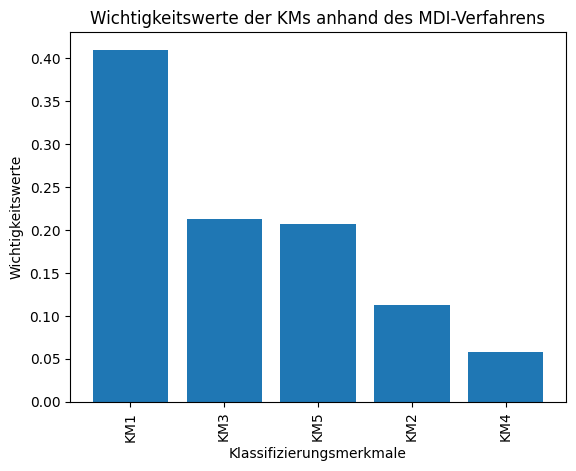

Feature importance by MDI
KM1: 0.41
KM3: 0.213
KM5: 0.206
KM2: 0.112
KM4: 0.058


In [12]:
# Convert categorical features to numerical
for column in ["CF1", "CF2", "CF3", "CF4", "CF5"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Split data into features and target
X = df[["CF1", "CF2", "CF3", "CF4", "CF5"]]

# Rename CF to german KM
X = X.rename(
    columns={"CF1": "KM1", "CF2": "KM2", "CF3": "KM3", "CF4": "KM4", "CF5": "KM5"}
)
y = df["Attitude"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Wichtigkeitswerte der KMs anhand des MDI-Verfahrens")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Add x-axis label
plt.xlabel("Klassifizierungsmerkmale")

# Add y-axis label
plt.ylabel("Wichtigkeitswerte")

# Show plot
plt.show()

# Print raw values with KMs to terminal
print("Feature importance by MDI")
for i in range(X.shape[1]):
    print(f"{names[i]}: {round(importances[indices[i]], 3)}")